In [110]:
import pandas as pd
df = pd.read_csv('reddit_data.csv')

In [111]:
# Load the regular expression library
import re
# Remove punctuation
df['reddit_data_processed'] = \
df['Text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['reddit_data_processed'] = \
df['reddit_data_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['reddit_data_processed'].head()

<>:5: DeprecationWarning: invalid escape sequence '\.'
<>:5: DeprecationWarning: invalid escape sequence '\.'
/var/folders/fz/y86s7p013bv90y72r734351c0000gn/T/ipykernel_46062/4033261589.py:5: DeprecationWarning: invalid escape sequence '\.'
  df['Text'].map(lambda x: re.sub('[,\.!?]', '', x))


0    this is like the 1000th time (being dramatic) i hear about apple canceling the project 😂                                                                                
1    i’m sure the heat pump engineers will do great work on next token predictors                                                                                            
2    that title makes no sense its like saying the chefs in our hotel are being moved to the cleaning team totally different skills\nwould expect layoffs if its true instead
3    if apple was serious about evs they would just buy rivian                                                                                                               
4    bloomberg isn’t homogeneous mark gurman has an excellent track record and wasn’t a part of that story                                                                   
Name: reddit_data_processed, dtype: object

In [113]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Load the dataset
#reddit_data = pd.read_csv('reddit_data.csv')  # Replace with your file path

# Preprocess function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply preprocessing to each comment
df['reddit_data_processed'] = df['reddit_data_processed'].apply(preprocess_text)

# Display the first few rows of the processed dataset
print(df.head())

# Save the preprocessed data to a new CSV file
#df.to_csv('preprocessed_reddit_data.csv', index=False)

            Author  \
0  Wasaab            
1  frownGuy12        
2  IAmA5starman      
3  stroll_on         
4  throwmeaway1784   

                                                                                                                                                                           Text  \
0  This is like the 1000th time (being dramatic) I hear about Apple canceling the project. 😂                                                                                      
1  I’m sure the heat pump engineers will do great work on next token predictors.                                                                                                  
2  That title makes no sense, its like saying the chefs in our hotel are being moved to the cleaning team, totally different skills.\nWould expect layoffs if its true instead.   
3  If Apple was serious about EVs, they would just buy Rivian.                                                                                         

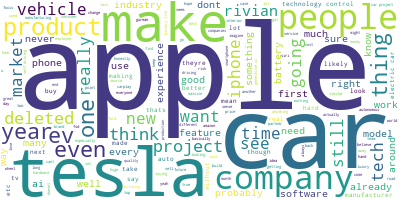

In [86]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['reddit_data_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [93]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import re
import pyLDAvis
import pyLDAvis.gensim

import matplotlib.pyplot as plt
import pandas as pd

In [94]:
df = pd.read_csv('reddit_data.csv') 
comments = df['Text'].values.tolist()

# Turn the list of string into a list of tokens
tokenized_comments = [comment.split() for comment in comments]

In [95]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(tokenized_comments)
# Create Corpus
texts = tokenized_comments
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


In [96]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=10,
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.036*"apple" + 0.029*"life" + 0.023*"make" + 0.017*"best" + 0.017*"top" + '
  '0.015*"iphone" + 0.015*"last" + 0.013*"everything" + 0.012*"products" + '
  '0.011*"wheels"'),
 (1,
  '0.044*"apple" + 0.030*"car" + 0.024*"would" + 0.019*"business" + '
  '0.019*"product" + 0.014*"see" + 0.012*"people" + 0.012*"makes" + '
  '0.012*"make" + 0.012*"could"'),
 (2,
  '0.072*"deleted" + 0.033*"point" + 0.020*"honestly" + 0.017*"pro" + '
  '0.016*"month" + 0.015*"apple" + 0.014*"know" + 0.011*"days" + 0.010*"wait" '
  '+ 0.010*"come"'),
 (3,
  '0.035*"tesla" + 0.022*"control" + 0.021*"car" + 0.020*"apple" + 0.018*"us" '
  '+ 0.017*"theyre" + 0.015*"imagine" + 0.013*"insurance" + 0.012*"might" + '
  '0.010*"would"'),
 (4,
  '0.048*"apple" + 0.047*"car" + 0.020*"like" + 0.016*"get" + 0.016*"battery" '
  '+ 0.012*"really" + 0.012*"company" + 0.012*"also" + 0.011*"new" + '
  '0.011*"iphone"'),
 (5,
  '0.053*"tesla" + 0.025*"phones" + 0.025*"model" + 0.018*"want" + '
  '0.017*"likely" + 0.016

In [97]:

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)

# Compute the Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)


Coherence Score: 0.4476894430444565


In [98]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel


# Function to compute coherence values for various numbers of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Set parameters
start = 2
limit = 20
step = 2

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=start, limit=limit, step=step)

# Print coherence values for various numbers of topics
for num_topics, coherence_value in zip(range(start, limit, step), coherence_values):
    print(f'Num Topics = {num_topics}, Coherence Score = {coherence_value}')

Num Topics = 2, Coherence Score = 0.4545619775989495
Num Topics = 4, Coherence Score = 0.4091009523316026
Num Topics = 6, Coherence Score = 0.3601632591670835
Num Topics = 8, Coherence Score = 0.3650927362921609
Num Topics = 10, Coherence Score = 0.3483237729185937
Num Topics = 12, Coherence Score = 0.3526896226654986
Num Topics = 14, Coherence Score = 0.3604628813421367
Num Topics = 16, Coherence Score = 0.34198903821787935
Num Topics = 18, Coherence Score = 0.3770771818089981


In [99]:
from pprint import pprint
# display topics
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('apple', 0.03561378),
   ('life', 0.02867877),
   ('make', 0.023406906),
   ('best', 0.017397275),
   ('top', 0.016594086),
   ('iphone', 0.01512709),
   ('last', 0.015031319),
   ('everything', 0.013458883),
   ('products', 0.011668817),
   ('wheels', 0.011245463)]),
 (1,
  [('apple', 0.04380209),
   ('car', 0.029771646),
   ('would', 0.024195611),
   ('business', 0.019450229),
   ('product', 0.018841142),
   ('see', 0.014469842),
   ('people', 0.012345569),
   ('makes', 0.012092114),
   ('make', 0.011689),
   ('could', 0.011558435)]),
 (2,
  [('deleted', 0.07169423),
   ('point', 0.032675225),
   ('honestly', 0.019831918),
   ('pro', 0.017180555),
   ('month', 0.01589138),
   ('apple', 0.014511269),
   ('know', 0.013618222),
   ('days', 0.010969836),
   ('wait', 0.009730959),
   ('come', 0.009617888)]),
 (3,
  [('tesla', 0.03512284),
   ('control', 0.021714523),
   ('car', 0.02053408),
   ('apple', 0.020361533),
   ('us', 0.017662955),
   ('theyre', 0.017025115),
   ('imagin

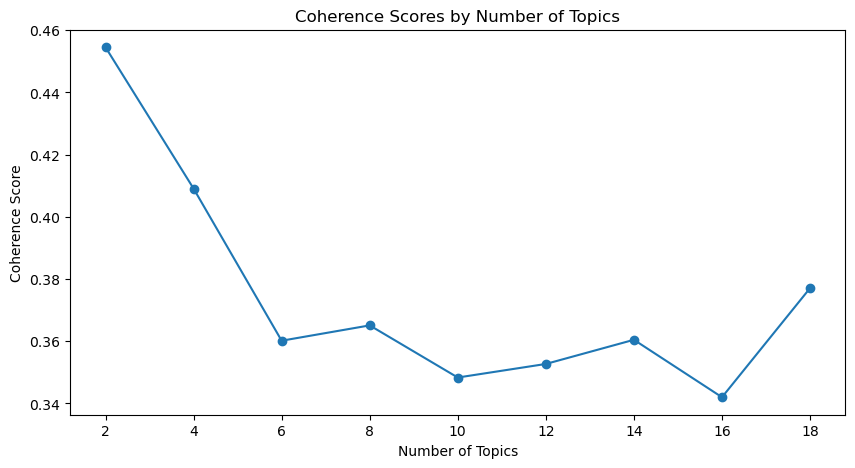

In [100]:
x = range(start, limit, step)

# Plotting the coherence values against the number of topics
plt.figure(figsize=(10, 5))
plt.plot(x, coherence_values, marker='o')
plt.title('Coherence Scores by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(x)
plt.show()

In [101]:
best_result_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[best_result_index]
# Select the model and print the topics
model_topics = optimal_model.show_topics(formatted=False)
print(f'''The {x[best_result_index]} topics gives the highest coherence score 
of {coherence_values[best_result_index]}''')

The 2 topics gives the highest coherence score 
of 0.4545619775989495


In [102]:
tm_results = lda_model[corpus]

In [103]:
topics = [[(term, round(wt, 3)) for term, wt in lda_model.show_topic(n, topn=20)] for n in range(0, lda_model.num_topics)]

In [104]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 21)], index=['Topic '+str(t) for t in range(1, lda_model.num_topics+1)]).T
topics_df.head()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/IPython/core/formatters.py", line 223, in catch_format_error
    r = method(self, *args, **kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/IPython/core/formatters.py", line 344, in __call__
    return method()
           ^^^^^^^^
  File "/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/pandas/core/frame.py", line 1106, in _repr_html_
  File "/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/pandas/io/formats/format.py", line 1110, in to_html
    When formatting an Index subclass
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/pandas/io/formats/html.py", line 88, in to_string
    lines = self.render()
            ^^^^^^^^^^^^^
  File "/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/pandas/io/formats/html.py", line 644, in render
 

      Topic 1   Topic 2   Topic 3  Topic 4  Topic 5 Topic 6   Topic 7  \
Term1  apple   apple     deleted   tesla    apple    tesla   existing   
Term2  life    car       point     control  car      phones  luxury     
Term3  make    would     honestly  car      like     model   yet        
Term4  best    business  pro       apple    get      want    say        
Term5  top     product   month     us       battery  likely  market     

       Topic 8        Topic 9 Topic 10  
Term1  supply   without        long     
Term2  chain    year           away     
Term3  find     auto           seems    
Term4  two      manufacturing  lol      
Term5  problem  manufacturers  system   

In [105]:
# set column width
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, lda_model.num_topics+1)] )
topics_df.head(10)

Unexpected exception formatting exception. Falling back to standard exception


/var/folders/fz/y86s7p013bv90y72r734351c0000gn/T/ipykernel_46062/1841895743.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)
Traceback (most recent call last):
  File "/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/IPython/core/formatters.py", line 223, in catch_format_error
    r = method(self, *args, **kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/IPython/core/formatters.py", line 344, in __call__
    return method()
           ^^^^^^^^
  File "/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/pandas/core/frame.py", line 1106, in _repr_html_
  File "/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/pandas/io/formats/format.py", line 1110, in to_html
    When formatting an Index subclass
             ^^^^^^^^^^^^^^^^^^^^^^

                                                                                                                                                         Terms per Topic
Topic1   apple, life, make, best, top, iphone, last, everything, products, wheels, know, battery, full, case, max, screen, either, manufacturing, good, give            
Topic2   apple, car, would, business, product, see, people, makes, make, could, luxury, market, software, right, tech, every, driving, said, phone, electric            
Topic3   deleted, point, honestly, pro, month, apple, know, days, wait, come, series, decade, isnt, hundreds, lol, probably, five, project, vision, throw               
Topic4   tesla, control, car, apple, us, theyre, imagine, insurance, might, would, cars, traditional, though, features, power, similar, working, anything, keep, battery
Topic5   apple, car, like, get, battery, really, company, also, new, iphone, people, much, need, think, making, something, industry, rivian, going, would  

In [106]:
# Define your topics and terms
topics_terms = {
    "Topic1": "apple, life, make, best, top, iphone, last, everything, products, wheels, know, battery, full, case, max, screen, either, manufacturing, good, give",
    "Topic2": "apple, car, would, business, product, see, people, makes, make, could, luxury, market, software, right, tech, every, driving, said, phone, electric",
    "Topic3": "deleted, point, honestly, pro, month, apple, know, days, wait, come, series, decade, isnt, hundreds, lol, probably, five, project, vision, throw",
    "Topic4": "tesla, control, car, apple, us, theyre, imagine, insurance, might, would, cars, traditional, though, features, power, similar, working, anything, keep, battery",
    "Topic5": "apple, car, like, get, battery, really, company, also, new, iphone, people, much, need, think, making, something, industry, rivian, going, would",
    "Topic6": "tesla, phones, model, want, likely, quality, thats, amazon, end, everyone, around, existing, experience, feel, beat, none, guys, limited, play, talent",
    "Topic7": "existing, luxury, yet, say, market, ecosystem, care, ford, ones, airpods, bad, another, mac, nda, list, opinion, ago, music, ev, trying",
    "Topic8": "supply, chain, find, two, problem, apple, rather, one, fucking, become, party, true, late, important, ai, next, working, whatever, ways, months",
    "Topic9": "without, year, auto, manufacturing, manufacturers, pretty, highly, apple, light, size, ev, get, absolutely, done, lot, ahead, buttons, makers, owns, partner",
    "Topic10": "long, away, seems, lol, system, someone, consider, though, original, fact, sub, sure, harder, paid, trying, guy, years, avoid, realize, check"
}

# Print the header
print(f"{'Topic':<10} | {'Terms'}")

# Print a separator
print("-" * 100)

# Loop through the dictionary and print each topic and its terms
for topic, terms in topics_terms.items():
    # This formats each topic and its terms into columns
    print(f"{topic:<10} | {terms}")

    # Print a separator between topics for readability
    print("-" * 100)

    
    
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], 
                         columns = ['Term'+str(i) for i in range(1, 21)], 
                         index=['Topic '+str(t) for t in range(1, lda_model.num_topics+1)]).T
topics_df.head(10)

Topic      | Terms
----------------------------------------------------------------------------------------------------
Topic1     | apple, life, make, best, top, iphone, last, everything, products, wheels, know, battery, full, case, max, screen, either, manufacturing, good, give
----------------------------------------------------------------------------------------------------
Topic2     | apple, car, would, business, product, see, people, makes, make, could, luxury, market, software, right, tech, every, driving, said, phone, electric
----------------------------------------------------------------------------------------------------
Topic3     | deleted, point, honestly, pro, month, apple, know, days, wait, come, series, decade, isnt, hundreds, lol, probably, five, project, vision, throw
----------------------------------------------------------------------------------------------------
Topic4     | tesla, control, car, apple, us, theyre, imagine, insurance, might, would, cars, trad

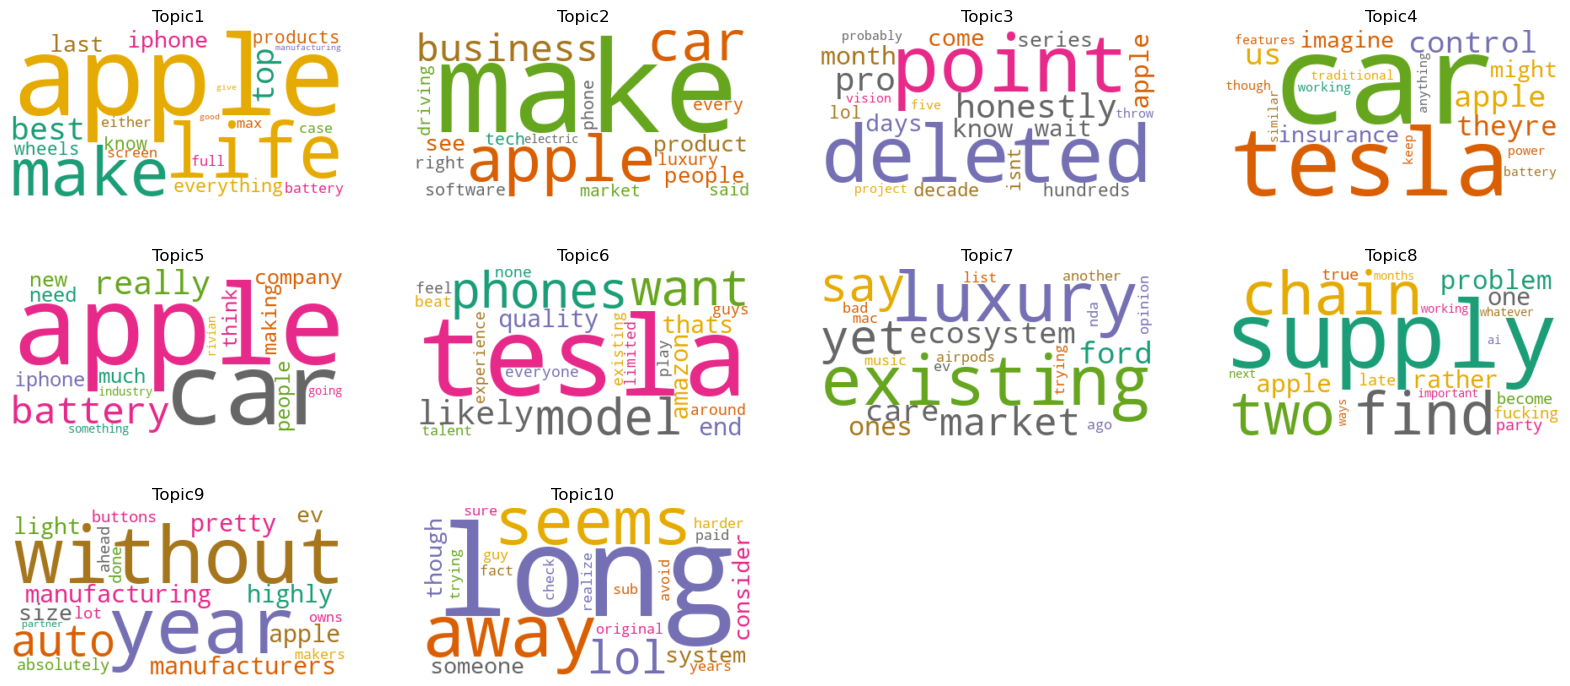

In [107]:

# import wordclouds
from wordcloud import WordCloud

# initiate wordcloud object
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

# set the figure size
plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots for each topic
for i in range(10):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

/var/folders/fz/y86s7p013bv90y72r734351c0000gn/T/ipykernel_46062/3062255960.py:145: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


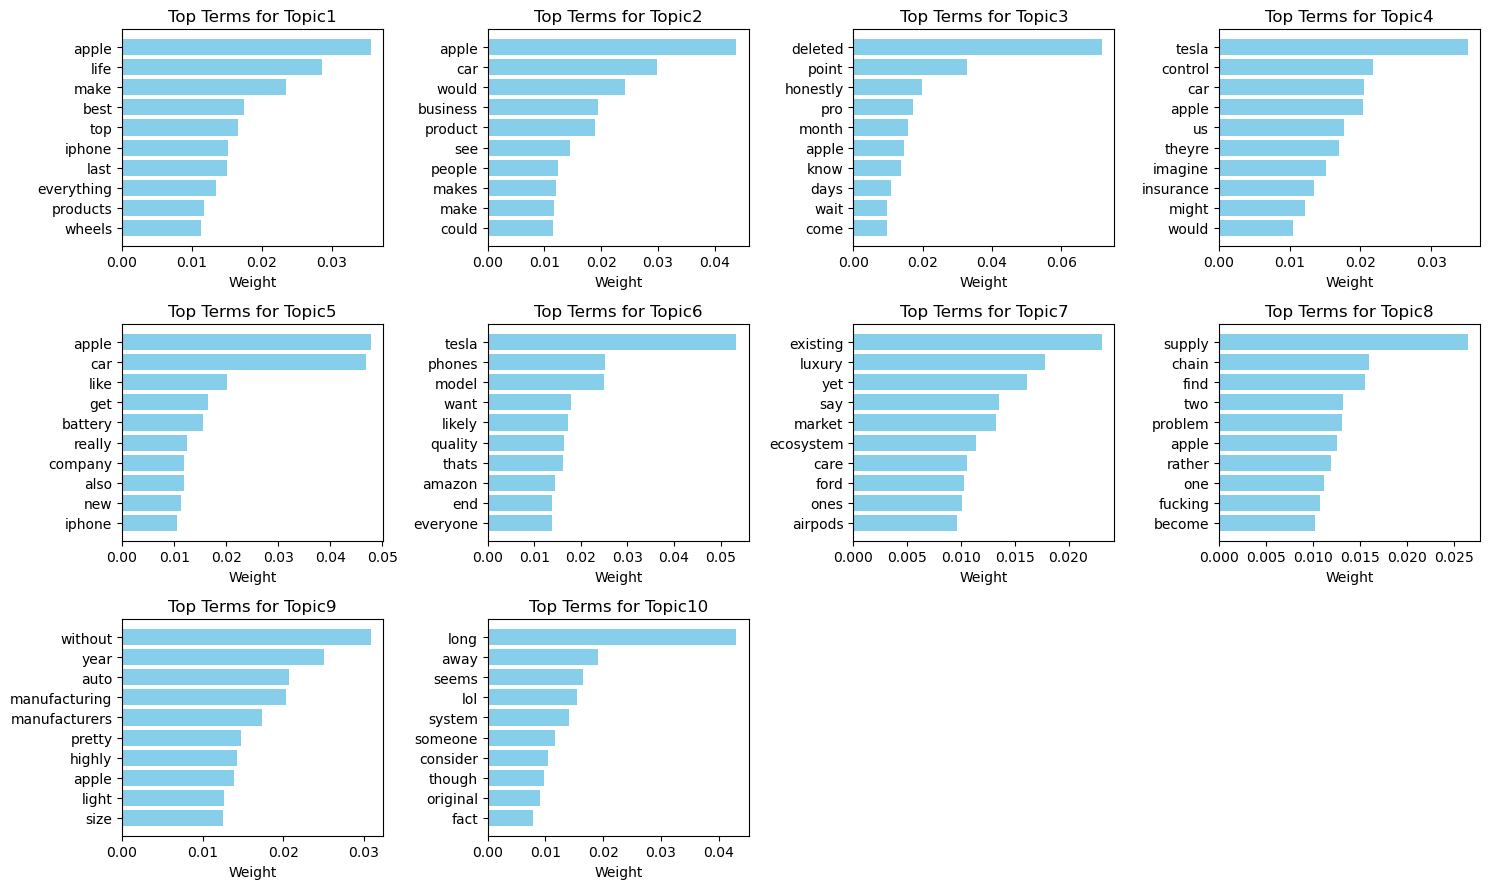

In [138]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming topics_terms is a dictionary where each key is a topic and each value is a list of tuples (term, weight)
topics_terms = {
    "Topic1": [('apple', 0.03561378),
   ('life', 0.02867877),
   ('make', 0.023406906),
   ('best', 0.017397275),
   ('top', 0.016594086),
   ('iphone', 0.01512709),
   ('last', 0.015031319),
   ('everything', 0.013458883),
   ('products', 0.011668817),
   ('wheels', 0.011245463)],
    "Topic2": [('apple', 0.04380209),
   ('car', 0.029771646),
   ('would', 0.024195611),
   ('business', 0.019450229),
   ('product', 0.018841142),
   ('see', 0.014469842),
   ('people', 0.012345569),
   ('makes', 0.012092114),
   ('make', 0.011689),
   ('could', 0.011558435)],
    "Topic3":
  [('deleted', 0.07169423),
   ('point', 0.032675225),
   ('honestly', 0.019831918),
   ('pro', 0.017180555),
   ('month', 0.01589138),
   ('apple', 0.014511269),
   ('know', 0.013618222),
   ('days', 0.010969836),
   ('wait', 0.009730959),
   ('come', 0.009617888)],
  "Topic4":
  [('tesla', 0.03512284),
   ('control', 0.021714523),
   ('car', 0.02053408),
   ('apple', 0.020361533),
   ('us', 0.017662955),
   ('theyre', 0.017025115),
   ('imagine', 0.015156038),
   ('insurance', 0.013476106),
   ('might', 0.012123703),
   ('would', 0.010438194)],
 "Topic5":
  [('apple', 0.047756065),
   ('car', 0.04687689),
   ('like', 0.020155266),
   ('get', 0.016424997),
   ('battery', 0.015619752),
   ('really', 0.012458321),
   ('company', 0.0119141145),
   ('also', 0.011856143),
   ('new', 0.01125732),
   ('iphone', 0.010562208)],
 "Topic6":
  [('tesla', 0.053381003),
   ('phones', 0.025244799),
   ('model', 0.024937525),
   ('want', 0.017847592),
   ('likely', 0.01717635),
   ('quality', 0.016369788),
   ('thats', 0.016241997),
   ('amazon', 0.014439394),
   ('end', 0.013908588),
   ('everyone', 0.013813831)],
 "Topic7":
  [('existing', 0.02310528),
   ('luxury', 0.01779486),
   ('yet', 0.01618485),
   ('say', 0.013521123),
   ('market', 0.0132515095),
   ('ecosystem', 0.011365995),
   ('care', 0.010554978),
   ('ford', 0.010290929),
   ('ones', 0.010065201),
   ('airpods', 0.009626807)],
 "Topic8":
  [('supply', 0.026483294),
   ('chain', 0.016028134),
   ('find', 0.015512433),
   ('two', 0.0131732775),
   ('problem', 0.01312794),
   ('apple', 0.0125613855),
   ('rather', 0.011953875),
   ('one', 0.011145847),
   ('fucking', 0.01071437),
   ('become', 0.010212834)],
 "Topic9":
  [('without', 0.030881789),
   ('year', 0.025058841),
   ('auto', 0.020743981),
   ('manufacturing', 0.02038727),
   ('manufacturers', 0.017413113),
   ('pretty', 0.0147766555),
   ('highly', 0.014282556),
   ('apple', 0.013850756),
   ('light', 0.012659864),
   ('size', 0.012483431)],
 "Topic10":
  [('long', 0.043036506),
   ('away', 0.01912004),
   ('seems', 0.01650075),
   ('lol', 0.015472557),
   ('system', 0.014138949),
   ('someone', 0.0115926685),
   ('consider', 0.010357498),
   ('though', 0.009801447),
   ('original', 0.00912322),
   ('fact', 0.007765677)]
}

num_topics = len(topics_terms)

# Determine the grid size for the subplots
# For instance, if you have 10 topics, you might want a 5x2 grid
num_rows = int(num_topics ** 0.5)
num_cols = int(np.ceil(num_topics / num_rows))

# Set up the figure size and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot a horizontal bar chart for each topic's terms and weights
for i, (topic, terms_weights) in enumerate(topics_terms.items()):
    ax = axes[i]
    terms, weights = zip(*terms_weights)  # Unpack the terms and weights
    ax.barh(range(len(terms)), weights, color='skyblue')
    ax.set_yticks(range(len(terms)))
    ax.set_yticklabels(terms)
    ax.set_xlabel('Weight')
    ax.set_title(f'Top Terms for {topic}')
    ax.invert_yaxis()  # Highest weights at the top

# Hide any unused subplots
for i in range(num_topics, num_rows*num_cols):
    axes[i].axis('off')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()
